<h1>CNN-RNN Model</h1>

In diesem Versuch wollen wir das CIFAR10 Dataset nutzen und die verschiedenen Bilder klassifizieren. 

Anders als bei den anderen soll hier ein RNN Layer eingesetzt werden. Hier wird für das CNN Model 3 verschiedene Layers getestet.: <br>
SimpleRNN, LSTM und GRU

In einigen Szenarien kann der Einsatz von RNN Layer helfen. RNN ist dafür ausgelegt sequenzielle Daten zu verbreiten, dabei find es auch Einsatz bei nichtsequentiellen Problemen.

Besonders Vorteilhaft ist der Einsatz von CNN-RNN bei Videos, da dort eine Sequenz vorhanden ist. Weitere Einsätze bei komplexeren Bildern mit veränder Struktur einer Sequenz.

In [59]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import visualkeras

In [77]:
# Lade Dataset #
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [61]:
X_train.shape

(50000, 32, 32, 3)

Bild: 32x32 und Channel: 3

In [62]:
y_train[:3]  # Klassen

array([[6],
       [9],
       [9]], dtype=uint8)

In [72]:
y_train.shape

(50000, 1)

In [82]:
y_train = y_train.reshape(-1, )

In [83]:
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [78]:
X_train_scaled = X_train / 255   
X_test_scaled  =  X_test / 255

C:\Users\Alexander\AppData\Local\Temp\ipykernel_22624\128572581.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  axs[i].set_title(klass_names[int(y_train[i])])


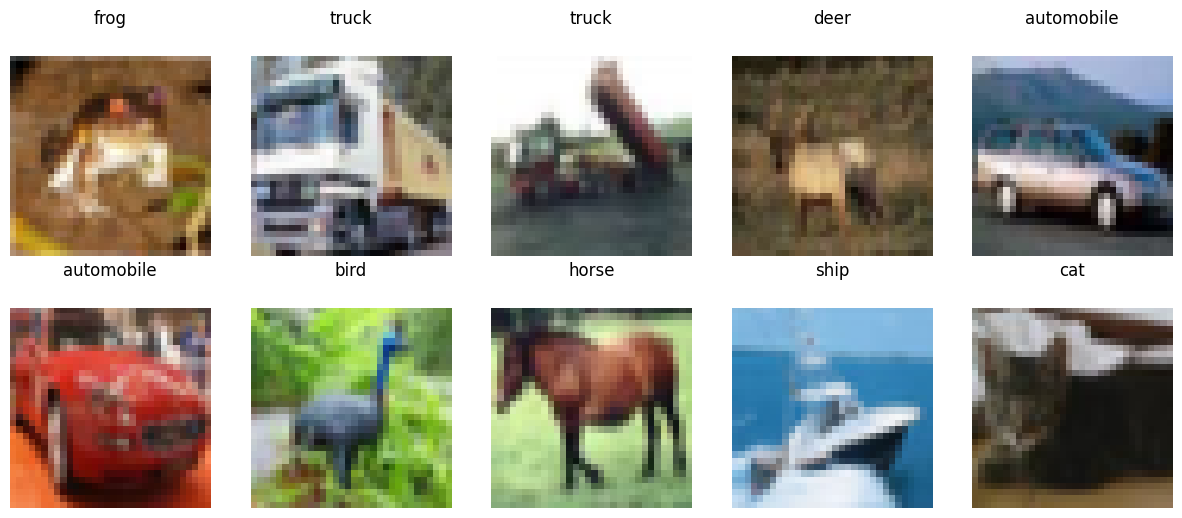

In [64]:
klass_names = {0: "airplane", 1:"automobile",2:"bird",
              3:"cat", 4:"deer", 5:"dog", 6:"frog", 7:"horse", 8:"ship", 9:"truck" }

fig, axs = plt.subplots(2,5, figsize=(15, 6))
axs = axs.ravel()

for i in range(10):
    axs[i].set_axis_off()
    axs[i].set_title(klass_names[int(y_train[i])])
    axs[i].matshow(X_train[i])

Für den Versuch werden wir als Basis ein CNN Model erstellen und die Ergebnisse am Ende vergleichen. 

In [126]:
model_cnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax"),
    
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/cnn_rnn/base_cnn", histogram_freq=1)

model_cnn.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)


In [127]:
model_cnn.summary()

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_84 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_85 (Conv2D)              │ (None, 30, 30, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_57 (MaxPooling2D) │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_86 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_58 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_29 (Flatten)            │ (None, 43264)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 64)             │     2,768,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,793,194 (10.66 MB)

 Trainable params: 2,793,194 (10.66 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\Alexander\anaconda3\envs\tensorflow\lib\site-packages\visualkeras\layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


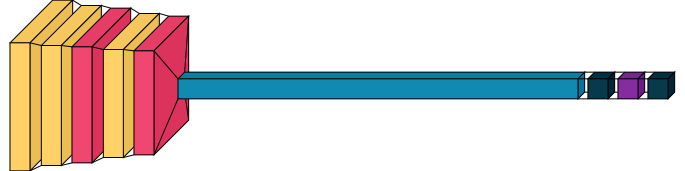

In [128]:
visualkeras.layered_view(model_cnn)

In [129]:
history_cnn = model_cnn.fit(X_train_scaled, y_train, callbacks=[tb_callback], epochs=10, batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.3569 - loss: 1.7646
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.5701 - loss: 1.1958
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.6294 - loss: 1.0378
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6696 - loss: 0.9266
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.6884 - loss: 0.8623
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7172 - loss: 0.7798
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7419 - loss: 0.7124
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7617 - loss: 0.6549
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7756 - loss: 0.6091
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.7957 - loss: 0.5529


In [131]:
model_cnn.evaluate(X_test_scaled, y_test, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6814 - loss: 1.0955


{'accuracy': 0.6764000058174133, 'loss': 1.111142635345459}

<h2>CNN-RNN</h2>

Jetzt werden verschiedene RNN Layer genutzt.

In [135]:
model_cnnrnn_rnn = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),

    # Resshape für RNN
    #tf.keras.layers.Flatten(), 
    tf.keras.layers.Reshape((64, -1)),  # (Sequenz, Features  pro Zeiteinheit) 

    tf.keras.layers.SimpleRNN(64),
    
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax"),
    
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/cnn_rnn/base_cnn_rnn", histogram_freq=1)

model_cnnrnn_rnn.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

In [137]:
model_cnnrnn_rnn.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_93 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_94 (Conv2D)              │ (None, 30, 30, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_95 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_64 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 64, 676)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │        47,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,818 (296.16 KB)

 Trainable params: 75,818 (296.16 KB)

 Non-trainable params: 0 (0.00 B)

In [138]:
history_cnn_rnn = model_cnnrnn_rnn.fit(X_train_scaled, y_train, callbacks=[tb_callback], epochs=10, batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - accuracy: 0.2804 - loss: 1.9080
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.4743 - loss: 1.4354
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5430 - loss: 1.2820
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5763 - loss: 1.1939
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5928 - loss: 1.1511
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6039 - loss: 1.1167
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6171 - loss: 1.0805
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6251 - loss: 1.0637
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6300 - loss: 1.0458
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6380 - loss: 1.0193


In [139]:
model_cnnrnn_rnn.evaluate(X_test_scaled, y_test, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6163 - loss: 1.0742


{'accuracy': 0.6146000027656555, 'loss': 1.0892945528030396}

<h3>LSTM</h3>

In [140]:
model_cnnrnn_lstm = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),

    # Resshape für RNN
    #tf.keras.layers.Flatten(), 
    tf.keras.layers.Reshape((64, -1)),  # (Sequenz, Features  pro Zeiteinheit) 

    tf.keras.layers.LSTM(64),
    
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax"),
    
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/cnn_rnn/base_cnn_rnn_lstm", histogram_freq=1)

model_cnnrnn_lstm.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

In [141]:
model_cnnrnn_lstm.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_96 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_97 (Conv2D)              │ (None, 30, 30, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_65 (MaxPooling2D) │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_98 (Conv2D)              │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_66 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_3 (Reshape)             │ (None, 64, 676)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │       189,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 218,090 (851.91 KB)

 Trainable params: 218,090 (851.91 KB)

 Non-trainable params: 0 (0.00 B)

In [142]:
history_cnn_lstm = model_cnnrnn_lstm.fit(X_train_scaled, y_train, callbacks=[tb_callback], epochs=10, batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.2448 - loss: 1.9565
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.4523 - loss: 1.4790
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.5472 - loss: 1.2444
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5964 - loss: 1.1094
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6377 - loss: 1.0013
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.6674 - loss: 0.9211
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6980 - loss: 0.8389
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7277 - loss: 0.7626
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7443 - loss: 0.7134
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.7674 - loss: 0.6551


In [143]:
model_cnnrnn_lstm.evaluate(X_test_scaled, y_test, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6757 - loss: 0.9890


{'accuracy': 0.670799970626831, 'loss': 1.006498098373413}

<h3>GRU</h3>

In [144]:
model_cnnrnn_gru = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32,32,3)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), activation="relu", padding="same"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(1,1)),

    # Resshape für RNN
    #tf.keras.layers.Flatten(), 
    tf.keras.layers.Reshape((64, -1)),  # (Sequenz, Features  pro Zeiteinheit) 

    tf.keras.layers.GRU(64),
    
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax"),
    
])

tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/cnn_rnn/base_cnn_rnn_gru", histogram_freq=1)

model_cnnrnn_gru.compile(
    optimizer = 'adam',
    loss      = 'sparse_categorical_crossentropy',
    metrics   = ['accuracy']
)

In [145]:
model_cnnrnn_gru.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_99 (Conv2D)              │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_100 (Conv2D)             │ (None, 30, 30, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_67 (MaxPooling2D) │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_101 (Conv2D)             │ (None, 27, 27, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_68 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_4 (Reshape)             │ (None, 64, 676)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 64)             │       142,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_35 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_72 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 170,858 (667.41 KB)

 Trainable params: 170,858 (667.41 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
history_cnn_gru = model_cnnrnn_gru.fit(X_train_scaled, y_train, callbacks=[tb_callback], epochs=10, batch_size=32)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.2456 - loss: 1.9919
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.4840 - loss: 1.3933
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5791 - loss: 1.1565
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6338 - loss: 1.0160
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6700 - loss: 0.9203
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.6929 - loss: 0.8599
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7166 - loss: 0.7951
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7399 - loss: 0.7329
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7588 - loss: 0.6733
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7749 - loss: 0.6302


In [147]:
model_cnnrnn_gru.evaluate(X_test_scaled, y_test, return_dict=True)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6788 - loss: 0.9774


{'accuracy': 0.6765000224113464, 'loss': 0.9789543747901917}

<h2>Ergebnis</h2>

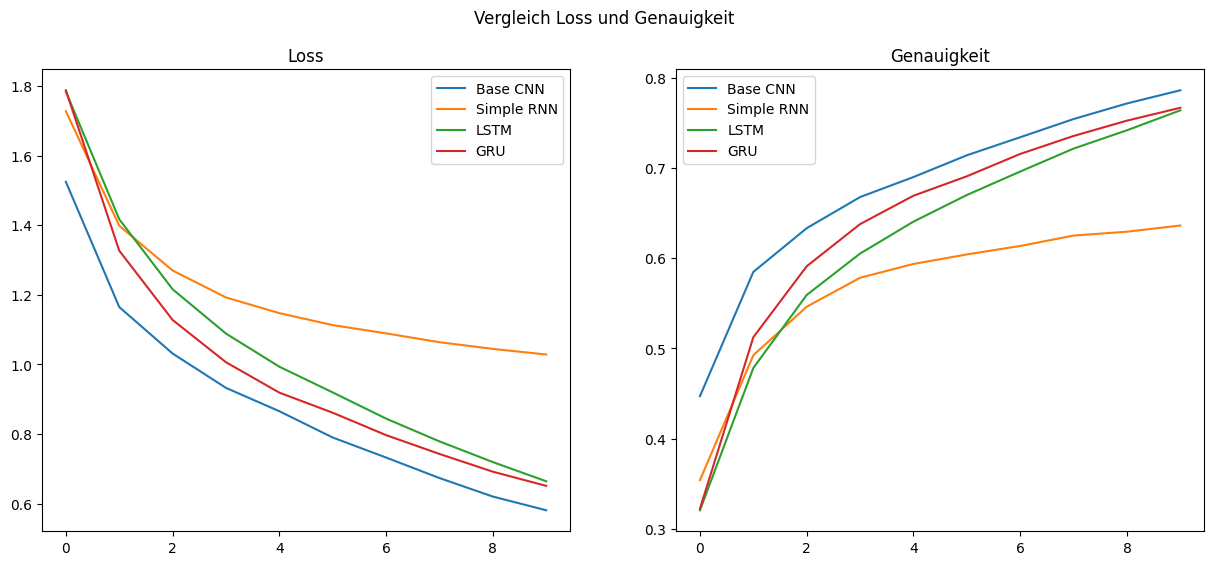

In [171]:
fig, axs = plt.subplots(1,2, figsize=(15, 6))
fig.suptitle("Vergleich Loss und Genauigkeit")
axs = axs.ravel()

axs[0].set_title("Loss")
axs[0].plot(history_cnn.history["loss"],      label="Base CNN")
axs[0].plot(history_cnn_rnn.history["loss"],  label="Simple RNN")
axs[0].plot(history_cnn_lstm.history["loss"], label="LSTM")
axs[0].plot(history_cnn_gru.history["loss"],  label="GRU")
axs[0].legend()

axs[1].set_title("Genauigkeit")
axs[1].plot(history_cnn.history["accuracy"],      label="Base CNN")
axs[1].plot(history_cnn_rnn.history["accuracy"],  label="Simple RNN")
axs[1].plot(history_cnn_lstm.history["accuracy"], label="LSTM")
axs[1].plot(history_cnn_gru.history["accuracy"],  label="GRU")
axs[1].legend()


In [174]:
# loclhost:6006
# - Siehe Tensorboard Doks.
!tensorboard --logdir logs/cnn_rnn/

^C
